In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
%matplotlib inline

In [2]:
class LinkedData():
    def __init__(self):
        self.df = pd.DataFrame([], columns=['sub','pro','obj'])
        self.graph = nx.DiGraph()
        
    def addRelation(self, dictionary):
        # no same relationships are allowed
        self.df = self.df.append(dictionary, ignore_index =True).drop_duplicates()

        
    def plot(self,dataBase):
        G = nx.DiGraph()

        labels = {}
        for index, row in dataBase.iterrows():
            G.add_edge(row['sub'], row['obj'])
            labels[(row['sub'], row['obj'])] = row['pro']
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1e3)
        nx.draw_networkx_edge_labels(G,pos, edge_labels=labels,font_color='red')
    
            
        
    def query(self, concept):
        subdf = self.df
        for key, value in concept.items():
            subdf = subdf[(subdf[key]==value)]
            
        self.plot(subdf)

    def showTable(self):
        display(self.df)

    

In [3]:
u = LinkedData()
# add relationship with triple structure
dictionary1 = {"sub":"pasta primavera", "pro":"has", "obj":"tomato sauce"}
dictionary2 = {"sub":"pasta primavera", "pro":"has","obj":"creme sauce"}
dictionary3 = {"sub":"tomato sauce", "pro":"has","obj":"salt"}
dictionary4 = {"sub":"yue", "pro":"like","obj":"pasta primavera"}
dictionary5 = {"sub":"eric", "pro":"like","obj":"salt"}
u.addRelation(dictionary1)
u.addRelation(dictionary2)
u.addRelation(dictionary3)
u.addRelation(dictionary4)
u.addRelation(dictionary5)
u.showTable()

,sub,pro,obj
0,pasta primavera,has,tomato sauce
1,pasta primavera,has,creme sauce
2,tomato sauce,has,salt
3,yue,like,pasta primavera
4,eric,like,salt


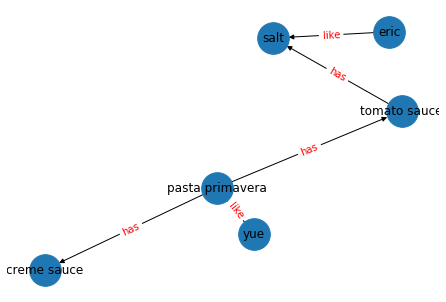

In [4]:
# show all
relation = {}
u.query(relation)

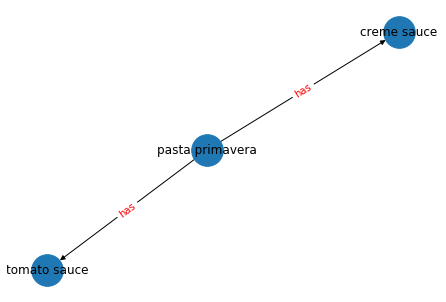

In [5]:
# can query with subject 
relation = {"sub":"pasta primavera"}
u.query(relation)

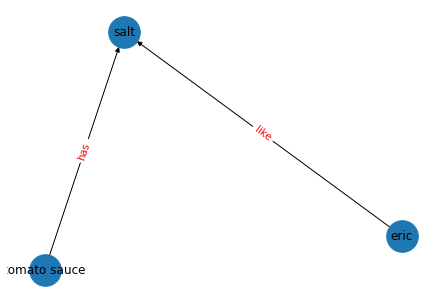

In [6]:
# query can be object 
relation = {"obj":"salt"}
u.query(relation)

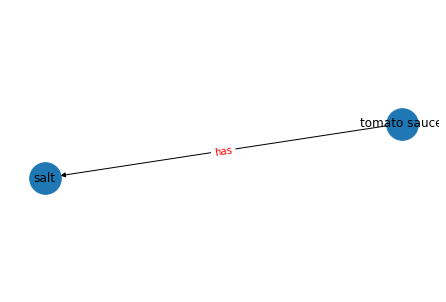

In [7]:
# query with certain relationship
relation = {"sub":"tomato sauce", "pro":"has","obj":"salt"}
u.query(relation)